#  **The Sparks Foundation**

## **Data Science And Business Analytics Internship (GRIP July21)**

# **Author: Sagar Gaikwad**

● Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’.

● As a business manager, try to find out the weak areas where you can 
  work to make more profit. 
  
● What all business problems you can derive by exploring the data?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#creating dataframe

df=pd.read_csv(r'SampleSuperStore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### Data Preprocessing


In [3]:
#checking for dimension,datatypes of dataset

print(df.shape)
print(df.dtypes)

(9994, 13)
Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df.describe(include="all")

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5191,9994,915,2001,NaN,3203,6026,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,NaN,NaN,NaN,NaN,NaN,32063.693350,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,NaN,NaN,NaN,NaN,NaN,56430.500000,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


In [6]:
#Check unique values in each column

for i in df.columns:
    print(i,len(df[i].unique()))

Ship Mode 4
Segment 3
Country 1
City 531
State 49
Postal Code 631
Region 4
Category 3
Sub-Category 17
Sales 5825
Quantity 14
Discount 12
Profit 7287


In [7]:
#Check null values

df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
#check for duplicate values

df.duplicated().sum()

17

In [9]:
#drop duplicate values
df.drop_duplicates()
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [10]:
#Remove not required columns

df=df.drop(columns=['Postal Code','Country'],axis=1)
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### Exploratory Data Analysis

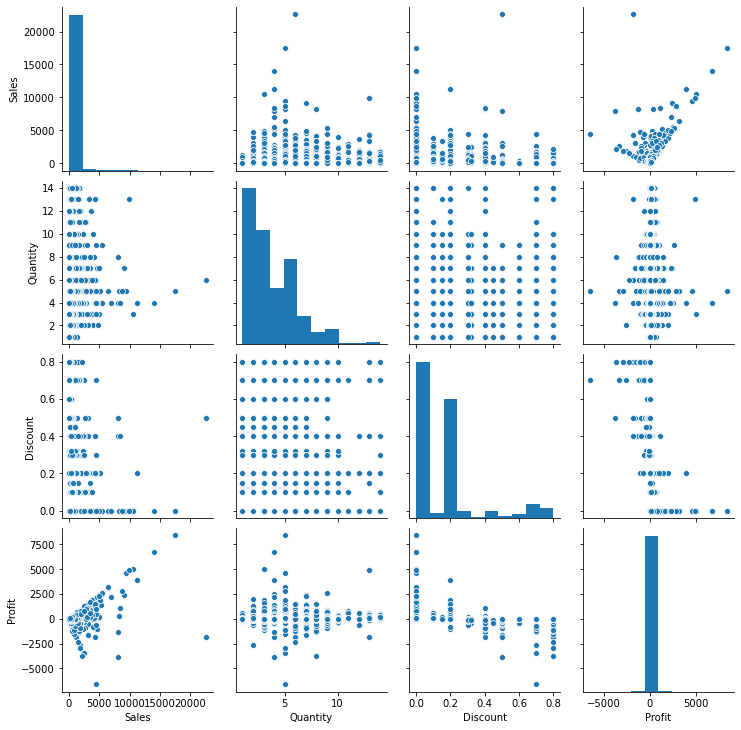

In [11]:
#visualizing whole dataest

sns.pairplot(df)

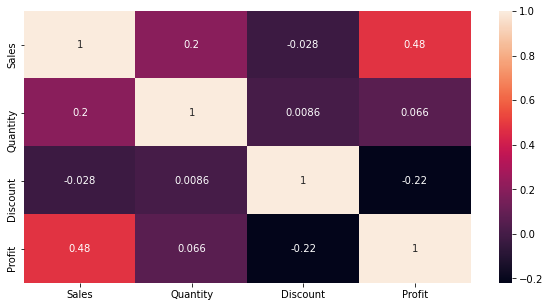

In [12]:
#Finding Correlation

df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

-> Sales and Profits are Moderately Correlated.

-> Quanity and Profits are less Moderately Correlated.

-> Discount and Profits are Negatively Correlated.



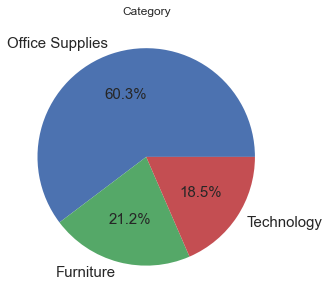

In [76]:
#Visualizing the category

plt.figure(figsize=(5,5))
textprops={"fontsize":15}
plt.title('Category')
plt.pie(df['Category'].value_counts(),labels=df['Category'].value_counts().index,autopct='%1.1f%%',textprops=textprops)
plt.show()

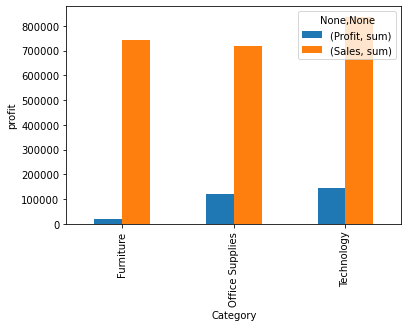

In [14]:
#Bar plot of the Category of Profit vs Sales

plt.figure
df.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.ylabel('profit')
plt.show()

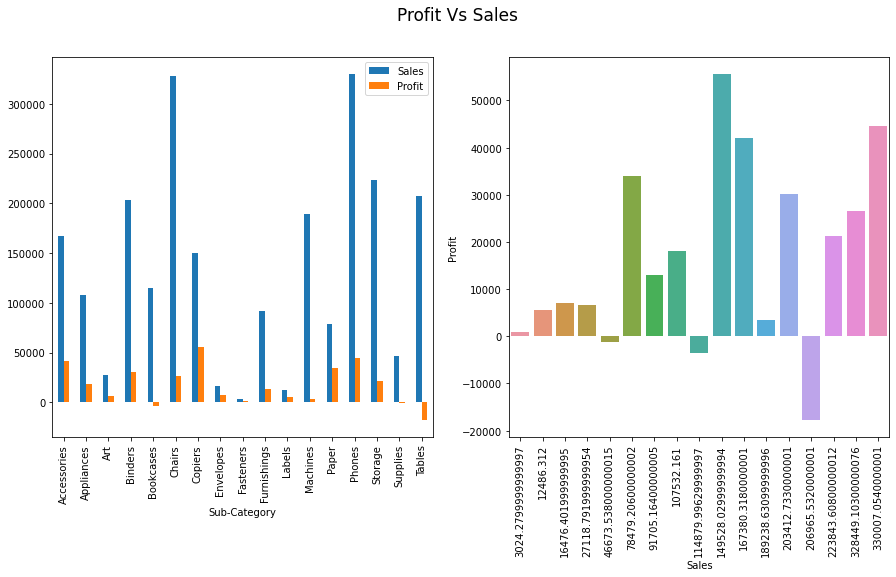

In [16]:
fig,axes=plt.subplots(1,2,figsize=(15,7))
fig.suptitle("Profit Vs Sales",size=17)
sns.barplot(data=df.groupby('Sub-Category')['Sales','Profit'].agg(sum),x='Sales',y='Profit',ax=axes[1])
df.groupby('Sub-Category')['Sales','Profit'].agg(sum).plot(kind='bar',ax=axes[0])
plt.xticks(rotation=90)
plt.show()

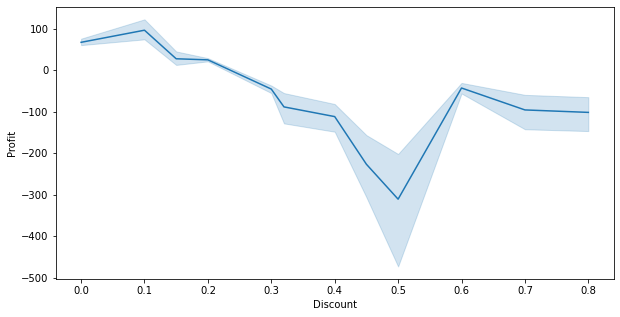

In [17]:
#visualizing the discount

plt.figure(figsize=(10,5))
sns.lineplot(df['Discount'],df['Profit'],data=df)

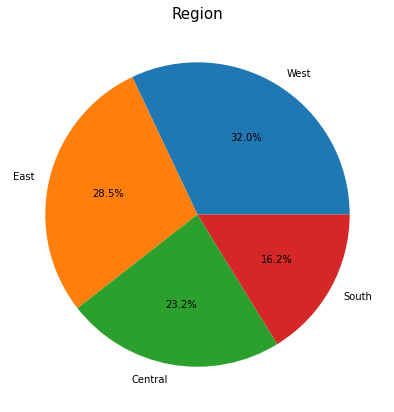

In [18]:
#Visualizing the sales vs Profit in different regions

plt.figure(figsize=(7,7))
plt.title('Region',size=15)
plt.pie(df['Region'].value_counts(),labels=df['Region'].value_counts().index,autopct='%1.1f%%')
plt.show()



#### Observation: East & West have almost similar Profits but Sales in East are lesser compare to West.

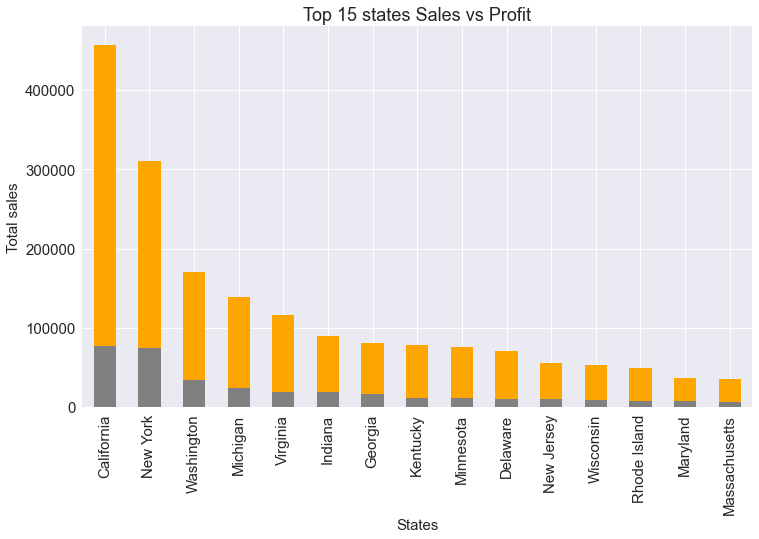

In [86]:
#Visualizing the sales Vs Profits in different states
# computing top states in terms of sales from first 15 observations

top_states = df.groupby("State").Sales.sum().nlargest(n=15)
top_states_p = df.groupby("State").Profit.sum().nlargest(n=15)

plt.style.use('seaborn')
top_states.plot(kind = 'bar',figsize = (12,7),fontsize = 15,color='orange')
top_states_p.plot(kind = 'bar',figsize = (12,7),fontsize = 15, color = 'grey')
plt.xlabel('States',fontsize = 15)
plt.ylabel('Total sales',fontsize = 15)
plt.title("Top 15 states Sales vs Profit",fontsize = 18)
plt.show()

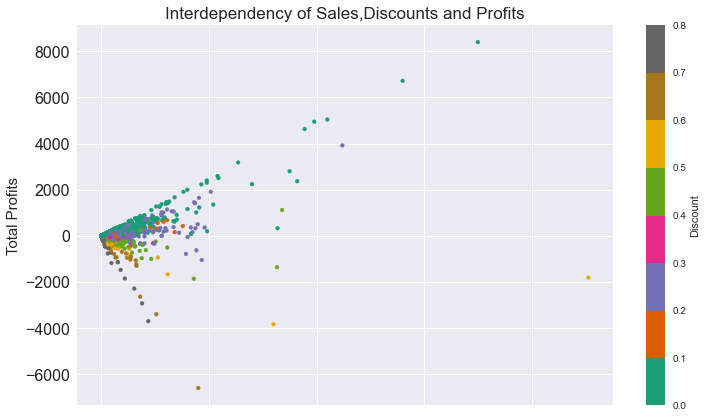

In [84]:
#Checking the interdependency of Sales,Profits and Discounts
plt.style.use('seaborn')
df.plot(kind = "scatter",figsize = (12,7), x = "Sales", y= "Profit", c = "Discount", s = 15,fontsize = 16, colormap = 'Dark2')
plt.ylabel('Total Profits',fontsize = 15)
plt.title("Interdependency of Sales,Discounts and Profits",fontsize = 17)

plt.show()

#### Observation: If we give more Discount on Products ,Sales will improve but Profit decreases.


## Conclusion :

We should limit sales of Office Supplies ,furniture and increase in technology as it will generate maximum profit.

As per sub-categories, sales of tables should be minimized.

We should increase sales in the east as it gives out more profit.

Concentrate on improving the sales of states like 'New York' and 'California' for more profits.